<center><h1>TOÁN ỨNG DỤNG VÀ THỐNG KÊ</h1>
<h2>Đồ án Linear-Regression</h2>
<b>Họ và tên:</b> Nguyễn Trần Thiên Phú <br>
<b>MSSV:</b> 23127246</center>

## 1. Giải thuật

### Giới thiệu 
**Hồi quy tuyến tính** là 1 quá trình dựa vào dữ liệu đã có để đưa ra 1 hàm xác định cho dữ liệu

> **Bước 1:** Cho 1 mô hình dữ liệu được mô phỏng bằng phương trình: $ Y =  \theta_0 + \theta_1X_1 + \theta_2X_2 + ... + \theta_kX_k $ với $X_i$ là các đặc trưng của X

> **Bước 2:** Lập các ma trận $ X, Y, \theta $ trong đó:
- $ X = (X_1X_2..X_k) $ với $X_i$ là các cột chứa dữ liệu đặc trưng thứ i của X
- $ Y $ là ma trận cột chứa các kết quả của mô hình
- $ \hat{\theta} $ là ma trận cột chứa $ \theta_i $

> **Bước 3:** Sử dụng công thức `OLS (Ordinary Least Square)`: $ \hat{\theta} = (X^{T}.X)^{-1}.X^{T}.Y $

> **Bước 4:** Tính tổng bình phương sai số bằng công thức tính `MSE (Medium Square Errors)`: $ \frac{1}{n}\sum_{i=1}^{n}(y_i - ŷ_i)^{2} $ với $ y_i, ŷ_i $ lần lượt là kết quả có sẵn và kết quả của mô hình vừa tìm




## 2. Bài toán hồi quy tuyến tính
### Chuẩn bị dữ liệu

In [13]:
import pandas as pd 
df = pd.read_csv('wine.csv')
df.columns = df.columns.str.strip()
df

,"""quality""","""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol"""
0,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
1,5,7.8,0.880,0.00,2.6,0.098,25.0,67,0.99680,3.20,0.68,9.8
2,5,7.8,0.760,0.04,2.3,0.092,15.0,54,0.99700,3.26,0.65,9.8
3,6,11.2,0.280,0.56,1.9,0.075,17.0,60,0.99800,3.16,0.58,9.8
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6,7.0,0.745,0.12,1.8,0.114,15.0,64,0.99588,3.22,0.59,9.5
1195,6,6.2,0.430,0.22,1.8,0.078,21.0,56,0.99633,3.52,0.60,9.5
1196,6,7.9,0.580,0.23,2.3,0.076,23.0,94,0.99686,3.21,0.58,9.5
1197,6,7.7,0.570,0.21,1.5,0.069,4.0,9,0.99458,3.16,0.54,9.8


In [14]:
def transpose_matrix(matrix):
    so_hang = len(matrix)
    so_cot = len(matrix[0])

    transposed_matrix= [[0 for _ in range(so_hang)] for _ in range(so_cot)]

    for i in range(so_hang):
        for j in range(so_cot):
           transposed_matrix[j][i] = matrix[i][j]
      
    return transposed_matrix
    
def inverse_matrix(matrix):
      
    n = len(matrix)
    if any(len(row) != n for row in matrix):
        raise ValueError("Lỗi: Ma trận đầu vào phải là ma trận vuông.")
    
    A = [row[:] for row in matrix]
    
    for i in range(n):
        identity_row = [1.0 if j == i else 0.0 for j in range(n)]
        A[i].extend(identity_row)

    for i in range(n):
        max_row = i
        for k in range(i + 1, n):
            if abs(A[k][i]) > abs(A[max_row][i]):
                max_row = k
        A[i], A[max_row] = A[max_row], A[i]

        # Kiểm tra ma trận khả nghịch
        pivot = A[i][i]
        if abs(pivot) < 1e-10:
            raise ValueError("Lỗi: Ma trận không khả nghịch (singular matrix).")

        for j in range(i, 2 * n):
            A[i][j] /= pivot

        for k in range(n):
            if k != i:
                factor = A[k][i]
                for j in range(i, 2 * n):
                    A[k][j] -= factor * A[i][j]
                    
    inverse_matrix = [row[n:] for row in A]

    return inverse_matrix

def matrix_multiply(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
        raise ValueError("Số cột của ma trận A phải bằng số hàng của ma trận B.")

    C = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                C[i][j] += A[i][k] * B[k][j]
    return C

def OLS(X,y):
    return matrix_multiply(inverse_matrix(matrix_multiply(transpose_matrix(X), X)), matrix_multiply(transpose_matrix(X), y))

def predict(X_b, beta):
    return matrix_multiply(X_b, beta)

def MSE(y_true, y_pred):
    rss = 0.0
    for i in range(len(y_true)):
        error = y_true[i][0] - y_pred[i][0]
        rss += error ** 2
    return rss/len(y_true)

def k_fold_cross_validation(data, headers, feature_col_names, target_col_name, k=10):
    feature_indices = [headers.index(name) for name in feature_col_names]
    target_index = headers.index(target_col_name)

    fold_size = len(data) // k
    total_mse = 0.0
    
    for i in range(k):
        start = i * fold_size
        end = start + fold_size if i != k - 1 else len(data)
        
        test_data = data[start:end]
        train_data = data[:start] + data[end:]

        X_train_data = [[row[j] for j in feature_indices] for row in train_data]
        y_train_data = [[row[target_index]] for row in train_data]
        X_train_b = [[1.0] + row for row in X_train_data]

        X_test_data = [[row[j] for j in feature_indices] for row in test_data]
        y_test_true = [[row[target_index]] for row in test_data]
        X_test_b = [[1.0] + row for row in X_test_data]

        try:
            beta = OLS(X_train_b, y_train_data)
            y_test_pred = predict(X_test_b, beta)
            fold_mse = MSE(y_test_true, y_test_pred)
            total_mse += fold_mse
        except ValueError:
            continue
            
    return total_mse / k

    

### Câu a: Sử dụng toàn bộ 11 đặc trưng đề bài cung cấp

In [15]:
feature_cols = [col for col in df.columns if col != '"quality"']
target_col = '"quality"'

X_data = df[feature_cols].values.tolist()
y_data = [[val] for val in df[target_col].values.tolist()]

X_b = [[1.0] + row for row in X_data]

beta = OLS(X_b, y_data)
beta_coeffs = [b[0] for b in beta]
  
y_pred = predict(X_b, beta)
mse_c = MSE(y_data, y_pred)
print("\n--- Kết quả Câu a ---")
print(f"Trung bình bình phương sai số (MSE): {mse_c:.4f}")
        
print("\n--- PHƯƠNG TRÌNH HỒI QUY TUYẾN TÍNH ---")
equation = f"quality = {beta_coeffs[0]:.4f} "
for i, col_name in enumerate(feature_cols):
    coeff = beta_coeffs[i+1]
    if coeff >= 0:
        equation += f"+ {coeff:.4f} * {col_name} \n"
    else:
        equation += f"- {-coeff:.4f} * {col_name} \n"
print(equation)




--- Kết quả Câu a ---
Trung bình bình phương sai số (MSE): 0.4072

--- PHƯƠNG TRÌNH HỒI QUY TUYẾN TÍNH ---
quality = 42.9172 + 0.0475 * "fixed acidity" 
- 1.0687 * "volatile acidity" 
- 0.2687 * "citric acid" 
+ 0.0350 * "residual sugar" 
- 1.5973 * "chlorides" 
+ 0.0035 * "free sulfur dioxide" 
- 0.0038 * "total sulfur dioxide" 
- 39.4691 * "density" 
- 0.2456 * "pH" 
+ 0.7738 * "sulphates" 
+ 0.2694 * "alcohol" 



### Câu b: Tìm ra đặc trưng cho sai số thấp nhất

In [16]:
df = pd.read_csv('wine.csv')
df.columns = df.columns.str.strip()
headers = list(df.columns)
data = df.values.tolist()
feature_cols_b = [h for h in headers if h != '"quality"']
target_col_b = '"quality"'
k_folds = 10 

best_feature_b = None
lowest_avg_mse_b = float('inf')
feature_mse_scores = {}

for feature in feature_cols_b:
    avg_mse = k_fold_cross_validation(data, headers, [feature], target_col_b, k=k_folds)
    feature_mse_scores[feature] = avg_mse
    
    if avg_mse < lowest_avg_mse_b:
        lowest_avg_rss_b = avg_mse
        best_feature_b = feature

print("\n--- Kết quả Câu b ---")
print(f"Đặc trưng đơn lẻ tốt nhất là: '{best_feature_b}'")
print(f"Với MSE trung bình qua {k_folds}-Fold CV là: {lowest_avg_rss_b:.4f}")

best_feature_index = headers.index(best_feature_b)
target_index = headers.index(target_col_b)

X_data_best = [[row[best_feature_index]] for row in data]
y_data_best = [[row[target_index]] for row in data]
X_b_best = [[1.0] + row for row in X_data_best]

beta_best = OLS(X_b_best, y_data_best)
beta_coeffs_best = [b[0] for b in beta_best]

print("\n--- PHƯƠNG TRÌNH HỒI QUY (1 ĐẶC TRƯNG TỐT NHẤT) ---")
equation_b = f'quality = {beta_coeffs_best[0]:.4f} '
coeff = beta_coeffs_best[1]
if coeff >= 0:
    equation_b += f'+ {coeff:.4f} * "{best_feature_b}"'
else:
    equation_b += f'- {-coeff:.4f} * "{best_feature_b}"'
print(equation_b)

print("\nBảng xếp hạng MSE của các đặc trưng (từ thấp đến cao):")
sorted_features = sorted(feature_mse_scores.items(), key=lambda item: item[1])
for feature, mse in sorted_features:
    print(f"- {feature}: {mse:.4f}")
    


--- Kết quả Câu b ---
Đặc trưng đơn lẻ tốt nhất là: '"alcohol"'
Với MSE trung bình qua 10-Fold CV là: 0.4945

--- PHƯƠNG TRÌNH HỒI QUY (1 ĐẶC TRƯNG TỐT NHẤT) ---
quality = 1.7741 + 0.3747 * ""alcohol""

Bảng xếp hạng MSE của các đặc trưng (từ thấp đến cao):
- "alcohol": 0.4945
- "volatile acidity": 0.5717
- "citric acid": 0.6347
- "total sulfur dioxide": 0.6377
- "sulphates": 0.6536
- "density": 0.6579
- "fixed acidity": 0.6588
- "chlorides": 0.6616
- "pH": 0.6677
- "residual sugar": 0.6706
- "free sulfur dioxide": 0.6711


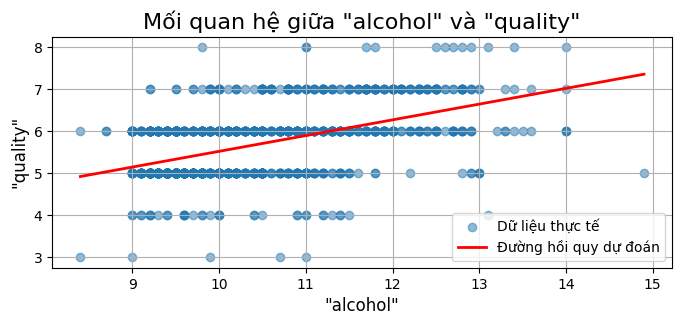

In [17]:
import matplotlib.pyplot as plt

best_feature_name = best_feature_b 
coefficients = beta_coeffs_best 

x_actual = df[best_feature_name].values.tolist()
y_actual = df['"quality"'].values.tolist()

intercept = coefficients[0]
slope = coefficients[1]

x_min = min(x_actual)
x_max = max(x_actual)

x_line = [x_min, x_max]

y_predicted_line = [intercept + slope * x for x in x_line]


plt.figure(figsize=(8, 3))
plt.scatter(x_actual, y_actual, alpha=0.5, label='Dữ liệu thực tế') 
plt.plot(x_line, y_predicted_line, color='red', linewidth=2, label='Đường hồi quy dự đoán')
plt.title(f'Mối quan hệ giữa {best_feature_name} và "quality"', fontsize=16)
plt.xlabel(best_feature_name, fontsize=12)
plt.ylabel('"quality"', fontsize=12)
plt.legend() 
plt.grid(True)

# Hiển thị đồ thị
plt.show()

**Nhận xét** Dựa vào đồ thị trên có thể thấy đường thẳng dựa trên mô hình vừa xây dựng bởi đặc trưng `"alcohol"` cắt ngang qua "đám mây" điểm là các giá trị `"quality"`, đường thẳng này không đi qua tất cả các điểm nhưng cũng đủ để cho thấy xu hướng chung của dữ liệu

### Câu c: Xác định mô hình cho sai số thấp nhất

In [18]:

original_feature_names = [h for h in headers if h != '"quality"']
quality_index = headers.index('"quality"')

poly2_headers = list(original_feature_names) 
for name in original_feature_names:
    poly2_headers.append(f"{name}^2")
poly2_headers.append('"quality"') 


poly2_data = []
for row in data:
    original_values = [row[headers.index(name)] for name in original_feature_names]
    squared_values = [val**2 for val in original_values]
    new_row = original_values + squared_values + [row[quality_index]]
    poly2_data.append(new_row)

print(f"Số lượng đặc trưng mới: {len(poly2_headers) - 1}")
print("Headers mới:", poly2_headers)

feature_names_c = [h for h in poly2_headers if h != '"quality"']
target_col_c = '"quality"'

feature_indices_c = [poly2_headers.index(name) for name in feature_names_c]
target_index_c = poly2_headers.index(target_col_c)

X_data_c = [[row[j] for j in feature_indices_c] for row in poly2_data]
y_data_c = [[row[target_index_c]] for row in poly2_data]

X_b_c = [[1.0] + row for row in X_data_c]

beta_c = OLS(X_b_c, y_data_c)
beta_coeffs_c = [b[0] for b in beta_c]

y_pred_c = predict(X_b_c, beta_c)
mse_c = MSE(y_data_c, y_pred_c)


print("\n--- Kết quả Câu c (Mô hình đa thức bậc 2) ---")
print(f"Trung bình bình phương sai số (MSE): {mse_c:.4f}")

print("\n--- PHƯƠNG TRÌNH HỒI QUY (22 ĐẶC TRƯNG) ---")
equation_c = f"quality = {beta_coeffs_c[0]:.4f} \n"
for i, col_name in enumerate(feature_names_c):
    coeff = beta_coeffs_c[i+1]
    if coeff >= 0:
        equation_c += f"+ {coeff:.4f} * {col_name} \n"
    else:
        equation_c += f"- {-coeff:.4f} * {col_name} \n"
print(equation_c)

Số lượng đặc trưng mới: 22
Headers mới: ['"fixed acidity"', '"volatile acidity"', '"citric acid"', '"residual sugar"', '"chlorides"', '"free sulfur dioxide"', '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"', '"alcohol"', '"fixed acidity"^2', '"volatile acidity"^2', '"citric acid"^2', '"residual sugar"^2', '"chlorides"^2', '"free sulfur dioxide"^2', '"total sulfur dioxide"^2', '"density"^2', '"pH"^2', '"sulphates"^2', '"alcohol"^2', '"quality"']

--- Kết quả Câu c (Mô hình đa thức bậc 2) ---
Trung bình bình phương sai số (MSE): 0.3890

--- PHƯƠNG TRÌNH HỒI QUY (22 ĐẶC TRƯNG) ---
quality = 6179.6371 
+ 0.2929 * "fixed acidity" 
- 1.0153 * "volatile acidity" 
- 1.1596 * "citric acid" 
+ 0.0568 * "residual sugar" 
- 1.0363 * "chlorides" 
+ 0.0127 * "free sulfur dioxide" 
- 0.0061 * "total sulfur dioxide" 
- 12354.2778 * "density" 
+ 3.3042 * "pH" 
+ 3.2388 * "sulphates" 
+ 0.5332 * "alcohol" 
- 0.0138 * "fixed acidity"^2 
- 0.0013 * "volatile acidity"^2 
+ 1.3922 * "citric aci

### Mô hình đa thức cho câu c
**Câu a** : Mô hình tuyến tính đa biến với 11 đặc trưng có sai số `MSE`: 0.4072<br>
**Câu c** : Mô hình tuyến tính đa biến với 22 đặc trưng gồm 11 đặc trưng gốc và 11 bình phương của các đặc trưng gốc có sai số `MSE`: 0.3890

$ \Longrightarrow$ Mô hình mới này cho sai số thấp hơn so với ở câu a. Dù số lượng đặc trưng đầu vào tăng lên nhưng đọ chính xác đã được cải thiện


## 3. Ý tưởng thực hiện và mô tả các hàm
#### `3.1 OLS(X,y)`
**Ý tưởng**: Mô phỏng lại công thức  `OLS (Ordinary Least Square)`: $ \theta = (X^{T}.X)^{-1}.X^{T}.Y $

**Mô tả hoạt động**: Sử dụng các hàm tính toán sau cho công thức trên

`transpose_matrix(matrix)`: Tạo ma trận chuyển vị

`inverse_matrix(matrix)`: Tạo ma trận nghịch đảo, dùng thuật toán Gauss-Jordan, các phép biến đổi sơ cấp trên dòng

`matrix_mutiply(A, B)`: Phép nhân 2 ma trận


#### `3.2 MSE(y_true, y_pred)`
**Ý tưởng**: Mô phỏng lại công thức tính trung bình bình phương sai số `MSE (Medium Square Errors)`: $ \frac{1}{n}\sum_{i=1}^{n}(y_i - ŷ_i)^{2} $

**Mô tả hoạt động**: Dựa vào các giá trị $ ŷ_i $ được trả về từ hàm `predict(X_b,beta)` để tính tổng bình phương sai số `RSS (Residual Sum of Square)` sau đó lấy kết quả vừa tìm chia cho kích thước dữ liệu hay số bộ dữ liệu

#### ` 3.3 k_fold_cross_validation(data, headers, feature_col_names, target_col_name, k=10)`
**Ý tưởng**: Chia tập dữ liệu thành `k` phần, cụ thể trong bài là 10 phần để đánh giá từng đặc trưng, dùng hàm `MSE(y_true, y_pred)` để trả về `MSE`trung bình cho từng đặc trưng

**Mô tả hoạt động**: Chia dữ liệu thành 10 phần mỗi phần có khoảng ~119 hàng. Khi vòng lặp `for` bắt đầu với `k` = 10, tập `Train` sẽ lấy lần lượt các phần dữ liệu và các phần còn lại là tập `Test`, cộng dồn `MSE` lại sau đó đem chia 10 để ra được `MSE` trung bình

